In [114]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 데이터 불러오기
raw_df1 = pd.read_csv('Data1.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생

# 복사본 만들기 
df = raw_df1.copy()



<h3>1. 결제취소건수 별 시군명 군집화</h3>

In [115]:
print(min(df['결제취소건수']))
print(max(df['결제취소건수']))

0.0
128058.0


시군 별로 결제취소건수 평균을 내어 군집화하기 전 각 시군별로 나와있는 결제건수들의 군집화 위치를 산포도로 확인

      기준연도  시군명 연령대 성별     결제건수          결제금액   결제취소건수       결제취소금액  1회평균결제금액  \
0     2023  가평군  10  남     8409  1.888451e+08     46.0    4871840.0   22457.0   
1     2023  가평군  10  여     6584  1.766054e+08     68.0    1841390.0   26823.0   
2     2023  가평군  20  남    70363  1.545018e+09    728.0   37559999.0   21958.0   
3     2023  가평군  20  여    55118  1.332507e+09    681.0   27996349.0   24176.0   
4     2023  가평군  30  남   110968  2.682235e+09   1382.0   84476317.0   24171.0   
...    ...  ...  .. ..      ...           ...      ...          ...       ...   
1532  2021  화성시  70  남    93924  2.016729e+09    878.0   36744696.0   21472.0   
1533  2021  화성시  70  여    94936  2.113137e+09    948.0   31082093.0   22259.0   
1534  2021  화성시  80  남    14820  2.960631e+08    128.0    3424209.0   19977.0   
1535  2021  화성시  80  여    19625  4.419913e+08    191.0    6208072.0   22522.0   
1536  2021  화성시  기타  -  1245634  2.980095e+10  11553.0  415381458.0   23924.0   

            총인구     총인구_남  

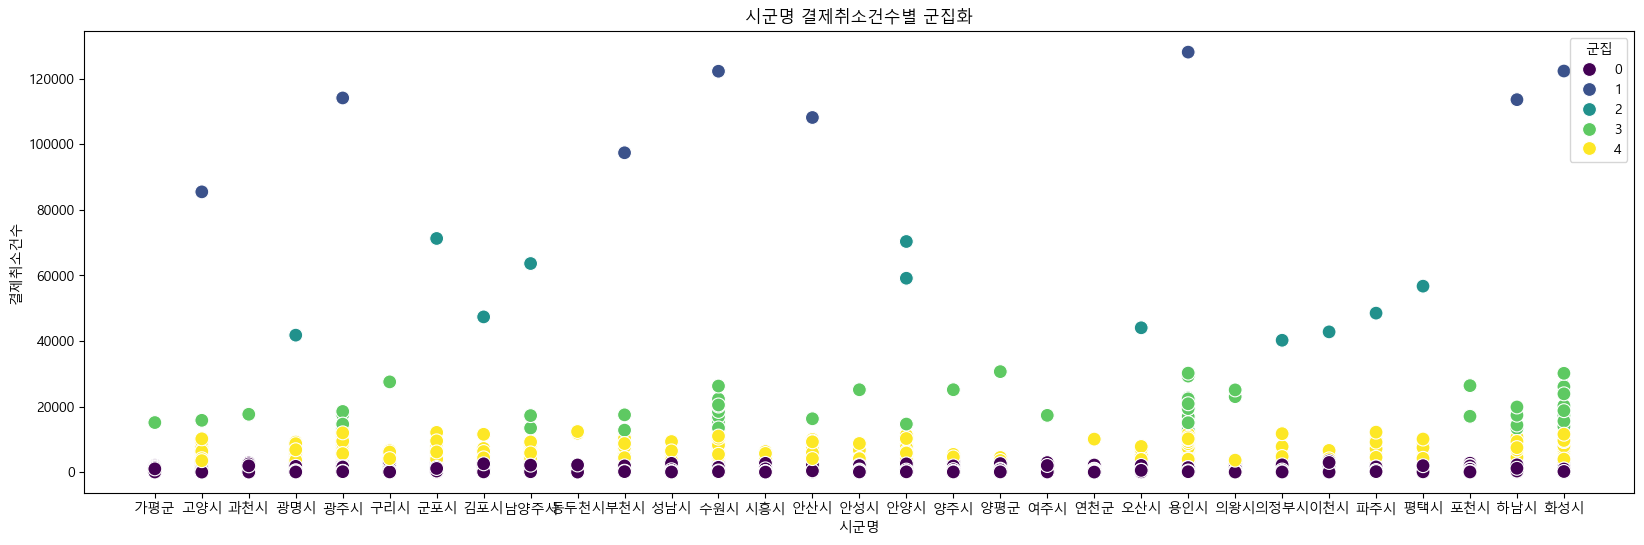

In [116]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


# 결제취소건수를 군집화하기 위해 필요한 데이터만 추출
X = df[['결제취소건수']]

# 결측값을 평균값으로 대체
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 결제취소건수 정규화 (0과 1 사이의 값으로 변환)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# KMeans를 사용하여 군집화
num_clusters = 5  # 원하는 군집 수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['군집'] = kmeans.fit_predict(X_scaled)

# 결과 출력
print(df)

# 시각화
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='시군명', y='결제취소건수', hue='군집', palette='viridis', s=100)
plt.title('시군명 결제취소건수별 군집화')
plt.xlabel('시군명')
plt.ylabel('결제취소건수')
plt.legend(title='군집')
plt.show()

시군별로 결제취소건수 평균하여 하나의 값으로 반환

In [117]:
# 시군명 별로 평균 결제취소건수를 계산
avg_cancel_count = df.groupby('시군명')['결제취소건수'].mean().reset_index()

# 결과 출력
print(avg_cancel_count)

     시군명        결제취소건수
0    가평군   1321.228571
1    고양시   5926.861111
2    과천시   1261.226415
3    광명시   3311.037736
4    광주시   7809.509434
5    구리시   2066.115385
6    군포시   5359.314286
7    김포시   3387.142857
8   남양주시   5365.147059
9   동두천시   1079.444444
10   부천시   7773.142857
11   성남시   1676.000000
12   수원시   9458.471698
13   시흥시   1414.407407
14   안산시   7976.457143
15   안성시   2358.019231
16   안양시   6020.870370
17   양주시   1906.627451
18   양평군   2323.098039
19   여주시   1425.588235
20   연천군    727.137255
21   오산시   3000.514286
22   용인시   9845.471698
23   의왕시   1996.648148
24  의정부시   3035.037736
25   이천시   3472.114286
26   파주시   4245.764706
27   평택시   4902.914286
28   포천시   1805.173077
29   하남시   8292.114286
30   화성시  10002.519231


시군별 군집화 실행

   군집                                                시군명
0   0  [가평군, 과천시, 구리시, 동두천시, 성남시, 시흥시, 안성시, 양주시, 양평군,...
1   1                                    [수원시, 용인시, 화성시]
2   2                         [고양시, 군포시, 남양주시, 안양시, 평택시]
3   3                    [광명시, 김포시, 오산시, 의정부시, 이천시, 파주시]
4   4                               [광주시, 부천시, 안산시, 하남시]


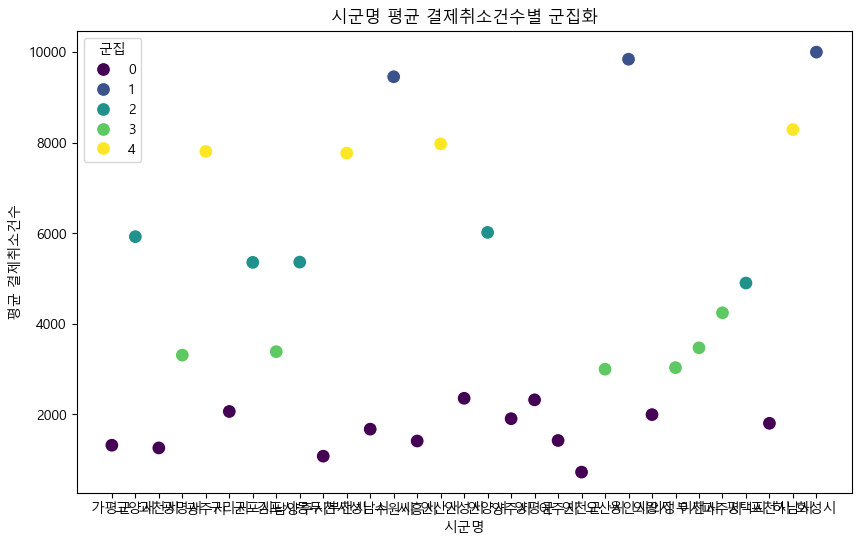

In [118]:

# 시군명 별로 평균 결제취소건수를 계산
avg_cancel_count = df.groupby('시군명')['결제취소건수'].mean().reset_index()

# 결제취소건수 정규화 (0과 1 사이의 값으로 변환)
scaler = MinMaxScaler()
avg_cancel_count['결제취소건수_scaled'] = scaler.fit_transform(avg_cancel_count[['결제취소건수']])

# KMeans를 사용하여 군집화
num_clusters = 5  # 원하는 군집 수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
avg_cancel_count['군집'] = kmeans.fit_predict(avg_cancel_count[['결제취소건수_scaled']])

# 각 군집별 시군명을 묶어서 출력
grouped = avg_cancel_count.groupby('군집')['시군명'].apply(list).reset_index()
print(grouped)

## 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_cancel_count, x='시군명', y='결제취소건수', hue='군집', palette='viridis', s=100)
plt.title('시군명 평균 결제취소건수별 군집화')
plt.xlabel('시군명')
plt.ylabel('평균 결제취소건수')
plt.legend(title='군집')
plt.show()

** 참고로 위는 군집의 순서정렬 전 말그대로 군집화만 진행한 것이기 때문에 군집0,1,2,3,4 는 다음 그래프에서 순서 정렬 됨

정렬된 군집별 결제취소건수 범위: 

군집 0의 결제취소건수 범위: 0.0 - 3453.0

군집 1의 결제취소건수 범위: 3493.0 - 12404.0

군집 2의 결제취소건수 범위: 12797.0 - 30639.0

군집 3의 결제취소건수 범위: 40202.0 - 71239.0

군집 4의 결제취소건수 범위: 85449.0 - 128058.0



군집화를 실행한 그래프 출력

   군집                                                시군명
0   0  [가평군, 과천시, 구리시, 동두천시, 성남시, 시흥시, 안성시, 양주시, 양평군,...
1   1                                    [수원시, 용인시, 화성시]
2   2                         [고양시, 군포시, 남양주시, 안양시, 평택시]
3   3                    [광명시, 김포시, 오산시, 의정부시, 이천시, 파주시]
4   4                               [광주시, 부천시, 안산시, 하남시]


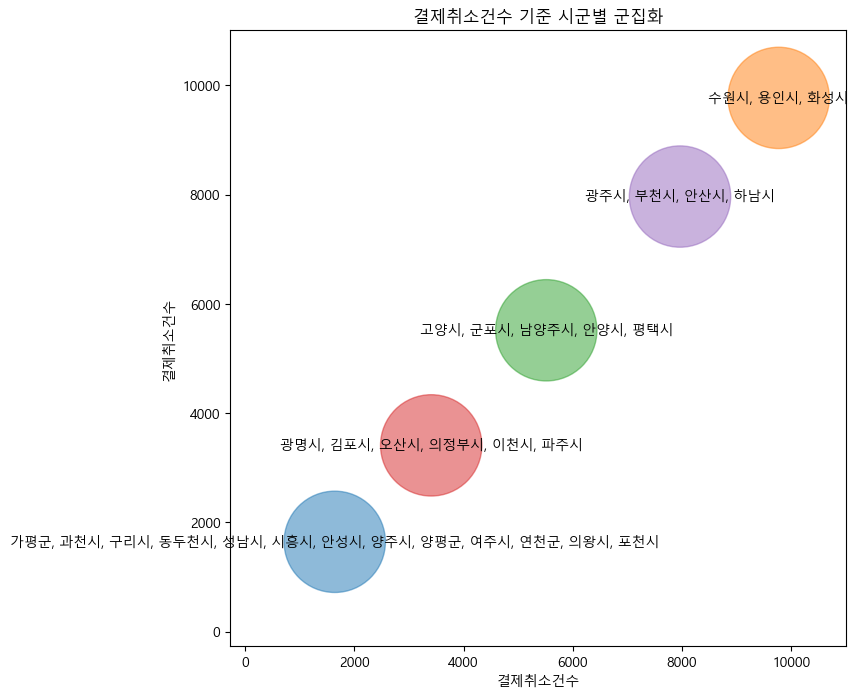

In [119]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 시군명 별로 평균 결제취소건수를 계산
avg_cancel_count = df.groupby('시군명')['결제취소건수'].mean().reset_index()

# KMeans를 사용하여 군집화
num_clusters = 5  # 원하는 군집 수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
avg_cancel_count['군집'] = kmeans.fit_predict(avg_cancel_count[['결제취소건수']])

# 각 군집별 시군명을 묶어서 출력
grouped = avg_cancel_count.groupby('군집')['시군명'].apply(list).reset_index()
print(grouped)

# 시각화
plt.figure(figsize=(20, 8))

# 원의 중심 좌표 설정
centers = kmeans.cluster_centers_

# 원의 반지름 설정
radius = 0.1  # 원의 반지름을 조정합니다.

# 군집의 결제취소건수 값으로 좌표를 설정합니다.
for i in range(num_clusters):
    cluster_points = avg_cancel_count[avg_cancel_count['군집'] == i]
    cluster_center = centers[i, 0]

    # 원 그리기
    circle = plt.Circle((cluster_center, cluster_center), radius * (avg_cancel_count['결제취소건수'].max() - avg_cancel_count['결제취소건수'].min()), color='C'+str(i), alpha=0.5)
    plt.gca().add_patch(circle)

    # 원 안에 텍스트 추가
    texts = ', '.join(cluster_points['시군명'])
    plt.text(cluster_center, cluster_center, texts, horizontalalignment='center', verticalalignment='center')

# 축 설정
plt.xlim(avg_cancel_count['결제취소건수'].min() - 1000, avg_cancel_count['결제취소건수'].max() + 1000)
plt.ylim(avg_cancel_count['결제취소건수'].min() - 1000, avg_cancel_count['결제취소건수'].max() + 1000)
plt.xlabel('결제취소건수')
plt.ylabel('결제취소건수')
plt.title('결제취소건수 기준 시군별 군집화')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


<hr>

<h3>2. 총인구수 별 외국인 비율 군집화</h3>

외국인 비율에 따라 높음,중간,낮음으로 군집화를 하기 위한 기준 값 설정하고자 필요 계산값을 도출

In [120]:
import pandas as pd

# 외국인 비율 계산
df['외국인비율'] = df['등록외국인_총인구'] / df['총인구']


# 외국인 비율의 통계 값 출력
mean_ratio = df['외국인비율'].mean()
median_ratio = df['외국인비율'].median()
std_ratio = df['외국인비율'].std()
max_ratio = df['외국인비율'].max()

print(f"평균 외국인 비율: {mean_ratio:.2%}")
print(f"중앙값 외국인 비율: {median_ratio:.2%}")
print(f"표준편차: {std_ratio:.2%}")
print(f"최고 외국인 비율: {max_ratio:.2%}")


# 외국인 비율이 높은 기준 설정 (예: 평균 + 1표준편차)
high_foreign_ratio_threshold = mean_ratio + std_ratio
print(f"높은 외국인 비율 기준: {high_foreign_ratio_threshold:.2%}")


평균 외국인 비율: 3.26%
중앙값 외국인 비율: 3.02%
표준편차: 2.32%
최고 외국인 비율: 9.74%
높은 외국인 비율 기준: 5.58%


시군별로 총인구 대비 등록 외국인 거주 비율 도출 & 기준값 대비 높음,중간,낮음으로 군집 설정 

In [121]:
import pandas as pd
import matplotlib.pyplot as plt


# 중복된 시군명 제거 (마지막 값을 남기고 제거)
df = df.drop_duplicates(subset=['시군명'], keep='last')

# 외국인 비율 계산
df['외국인비율'] = df['등록외국인_총인구'] / df['총인구']

# 외국인 비율의 통계 값 계산
mean_ratio = df['외국인비율'].mean()
std_ratio = df['외국인비율'].std()

# 외국인 비율 군집 기준 설정
high_threshold = mean_ratio + std_ratio
low_threshold = mean_ratio - std_ratio

# 군집화
def classify_ratio(ratio):
    if ratio > high_threshold:
        return '높음'
    elif ratio < low_threshold:
        return '낮음'
    else:
        return '중간'

df['군집'] = df['외국인비율'].apply(classify_ratio)

# 결과 출력
print(df[['시군명', '외국인비율', '군집']])


       시군명     외국인비율  군집
34     가평군  0.019487  중간
70     고양시  0.012260  중간
123    과천시  0.003006  낮음
176    광명시  0.010029  중간
229    광주시  0.034151  중간
281    구리시  0.007941  낮음
316    군포시  0.022019  중간
370    김포시  0.047517  중간
404   남양주시  0.011833  중간
458   동두천시  0.043654  중간
509    부천시  0.033509  중간
560    성남시  0.017761  중간
613    수원시  0.030174  중간
667    시흥시  0.069546  높음
719    안산시  0.077423  높음
771    안성시  0.070468  높음
825    안양시  0.011709  중간
876    양주시  0.033104  중간
927    양평군  0.012883  중간
977    여주시  0.040330  중간
1028   연천군  0.034244  중간
1063   오산시  0.040919  중간
1116   용인시  0.017792  중간
1170   의왕시  0.006817  낮음
1223  의정부시  0.013461  중간
1274   이천시  0.042636  중간
1327   파주시  0.028207  중간
1378   평택시  0.048885  중간
1430   포천시  0.097356  높음
1484   하남시  0.007877  낮음
1536   화성시  0.048174  중간


위 값을 토대로 시각화 도출

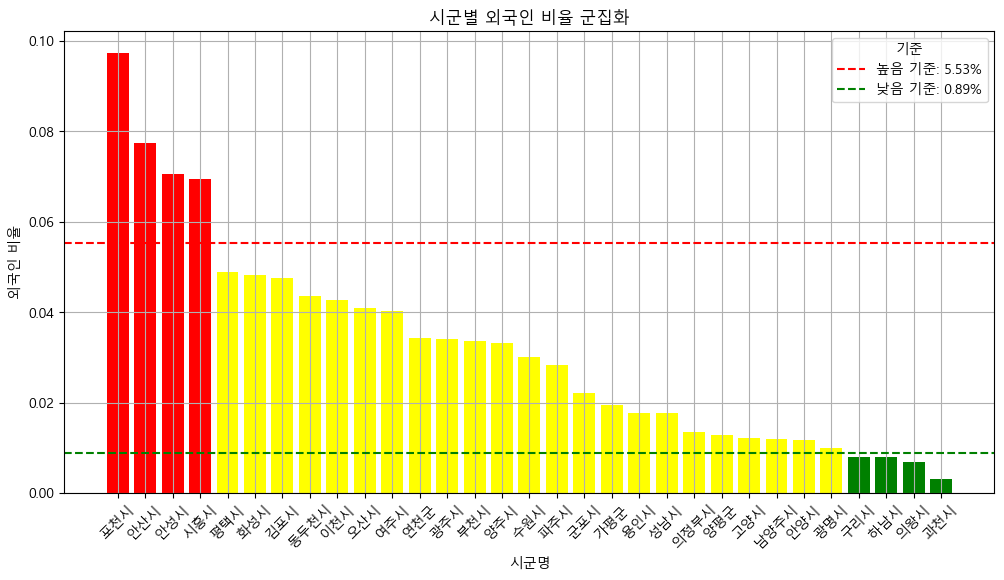

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# 중복된 시군명 제거 (마지막 값을 남기고 제거)
df = df.drop_duplicates(subset=['시군명'], keep='last')

# 외국인 비율 계산
df['외국인비율'] = df['등록외국인_총인구'] / df['총인구']

# 외국인 비율의 통계 값 계산
mean_ratio = df['외국인비율'].mean()
std_ratio = df['외국인비율'].std()

# 외국인 비율 군집 기준 설정
high_threshold = mean_ratio + std_ratio
low_threshold = mean_ratio - std_ratio

# 군집화
def classify_ratio(ratio):
    if ratio > high_threshold:
        return '높음'
    elif ratio < low_threshold:
        return '낮음'
    else:
        return '중간'

df['군집'] = df['외국인비율'].apply(classify_ratio)

# 외국인 비율을 기준으로 내림차순 정렬
df_sorted = df.sort_values(by='외국인비율', ascending=False)

# 군집에 따라 색상 지정
colors = {'높음': 'red', '중간': 'yellow', '낮음': 'green'}
df_sorted['color'] = df_sorted['군집'].apply(lambda x: colors[x])

# 시각화
plt.figure(figsize=(12, 6))

plt.bar(df_sorted['시군명'], df_sorted['외국인비율'], color=df_sorted['color'])

# 기준선 추가
plt.axhline(y=high_threshold, color='r', linestyle='--', label=f'높음 기준: {high_threshold:.2%}')
plt.axhline(y=low_threshold, color='g', linestyle='--', label=f'낮음 기준: {low_threshold:.2%}')

plt.xlabel('시군명')
plt.ylabel('외국인 비율')
plt.title('시군별 외국인 비율 군집화')
plt.legend(title='기준')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<hr>

<h3>3. 총 인구수 대비 결제 건수 군집화 </h3>

막대그래프를 이용해 총 인구수 대비 결제 건수 비율을 내림차순으로 시군별 정렬

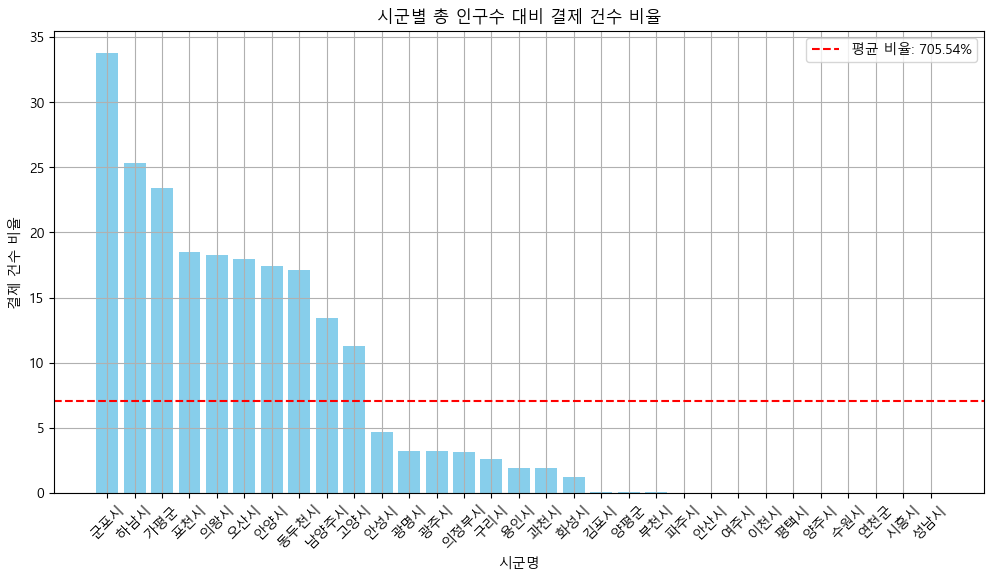

In [123]:
import pandas as pd
import matplotlib.pyplot as plt


# 시군명 별 총 결제건수 계산
df_total = df.groupby('시군명').agg({'결제건수': 'sum', '총인구': 'mean'}).reset_index()

# 총 결제건수 대비 총 인구수 비율 계산
df_total['결제건수_비율'] = df_total['결제건수'] / df_total['총인구']

# 데이터프레임을 결제 건수 비율 기준으로 내림차순 정렬
df_sorted = df_total.sort_values(by='결제건수_비율', ascending=False)

# 시각화
plt.figure(figsize=(12, 6))

# 막대그래프 그리기
plt.bar(df_sorted['시군명'], df_sorted['결제건수_비율'], color='skyblue')

# 평균 비율 기준선 추가
mean_ratio = df_sorted['결제건수_비율'].mean()
plt.axhline(y=mean_ratio, color='r', linestyle='--', label=f'평균 비율: {mean_ratio:.2%}')

plt.xlabel('시군명')
plt.ylabel('결제 건수 비율')
plt.title('시군별 총 인구수 대비 결제 건수 비율')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


2번 군집화처럼 3개의 군집으로 나눠보고자 기준 설정

In [124]:
# 비율의 통계 값 계산
mean_ratio = df_total['결제건수_비율'].mean()
std_ratio = df_total['결제건수_비율'].std()

# 군집화 기준 설정
high_threshold = mean_ratio + std_ratio
low_threshold = mean_ratio - std_ratio

# 군집화
def classify_ratio(ratio):
    if ratio > high_threshold:
        return '높음'
    elif ratio < low_threshold:
        return '낮음'
    else:
        return '중간'

df_total['군집'] = df_total['결제건수_비율'].apply(classify_ratio)


나누어 봤으나 하위권 시군들의 막대가 안보임

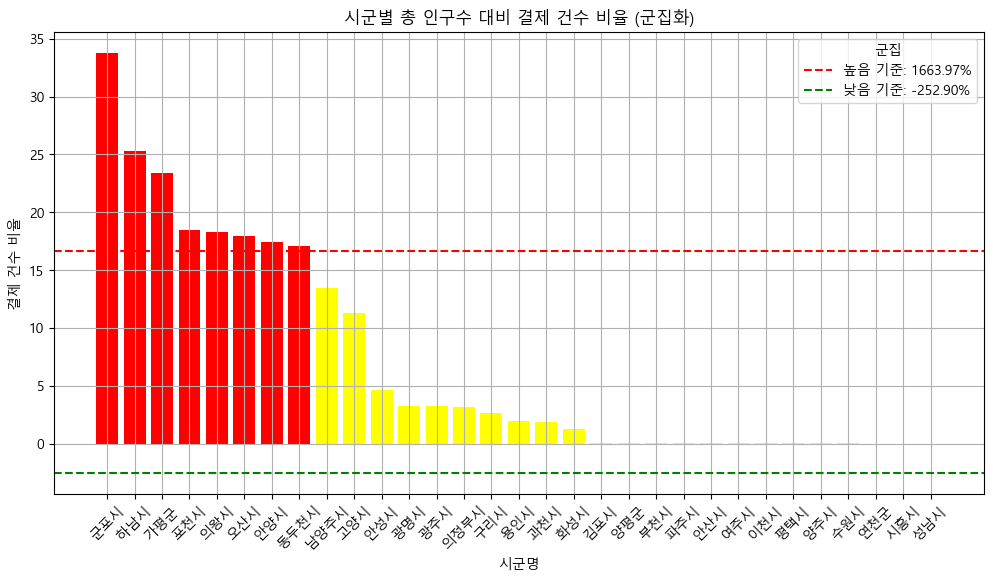

In [125]:
import pandas as pd
import matplotlib.pyplot as plt


# 시군명 별 총 결제건수 계산
df_total = df.groupby('시군명').agg({'결제건수': 'sum', '총인구': 'mean'}).reset_index()

# 총 결제건수 대비 총 인구수 비율 계산
df_total['결제건수_비율'] = df_total['결제건수'] / df_total['총인구']

# 비율의 통계 값 계산
mean_ratio = df_total['결제건수_비율'].mean()
std_ratio = df_total['결제건수_비율'].std()

# 군집화 기준 설정
high_threshold = mean_ratio + std_ratio
low_threshold = mean_ratio - std_ratio

# 군집화
def classify_ratio(ratio):
    if ratio > high_threshold:
        return '높음'
    elif ratio < low_threshold:
        return '낮음'
    else:
        return '중간'

df_total['군집'] = df_total['결제건수_비율'].apply(classify_ratio)

# 데이터프레임을 결제 건수 비율 기준으로 내림차순 정렬
df_sorted = df_total.sort_values(by='결제건수_비율', ascending=False)

# 군집에 따라 색상 지정
colors = {'높음': 'red', '중간': 'yellow', '낮음': 'green'}
df_sorted['color'] = df_sorted['군집'].apply(lambda x: colors[x])

# 시각화
plt.figure(figsize=(12, 6))

plt.bar(df_sorted['시군명'], df_sorted['결제건수_비율'], color=df_sorted['color'])

# 기준선 추가
plt.axhline(y=high_threshold, color='r', linestyle='--', label=f'높음 기준: {high_threshold:.2%}')
plt.axhline(y=low_threshold, color='g', linestyle='--', label=f'낮음 기준: {low_threshold:.2%}')

plt.xlabel('시군명')
plt.ylabel('결제 건수 비율')
plt.title('시군별 총 인구수 대비 결제 건수 비율 (군집화)')
plt.legend(title='군집')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


위의 평균과 표준편차를 기준으로 잡았을때 높음과 중간 이렇게 두 가지로만 나누어짐

=> 따라서 이 비율은 맨 위 파란색 막대그래프(평균이 기준이 된)를 참고 하는 것이 좋을 것 으로 생각 됨 

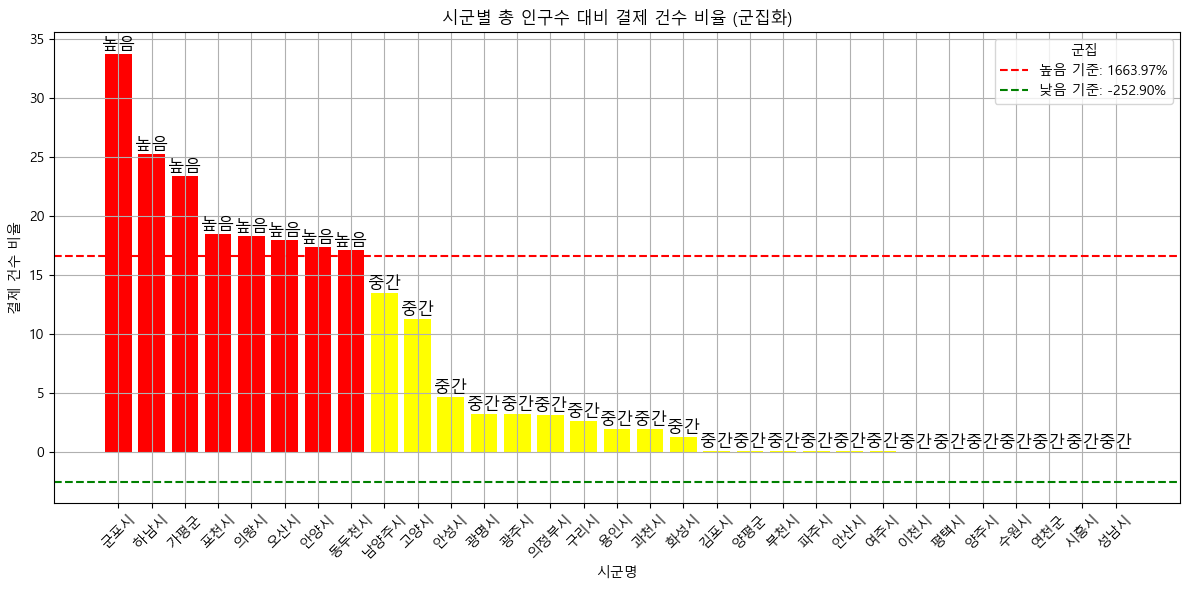

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# 시군명 별 총 결제건수 계산
df_total = df.groupby('시군명').agg({'결제건수': 'sum', '총인구': 'mean'}).reset_index()

# 총 결제건수 대비 총 인구수 비율 계산
df_total['결제건수_비율'] = df_total['결제건수'] / df_total['총인구']

# 비율의 통계 값 계산
mean_ratio = df_total['결제건수_비율'].mean()
std_ratio = df_total['결제건수_비율'].std()

# 군집화 기준 설정
high_threshold = mean_ratio + std_ratio
low_threshold = mean_ratio - std_ratio

# 군집화
def classify_ratio(ratio):
    if ratio > high_threshold:
        return '높음'
    elif ratio < low_threshold:
        return '낮음'
    else:
        return '중간'

df_total['군집'] = df_total['결제건수_비율'].apply(classify_ratio)

# 데이터프레임을 결제 건수 비율 기준으로 내림차순 정렬
df_sorted = df_total.sort_values(by='결제건수_비율', ascending=False)

# 군집에 따라 색상 지정
colors = {'높음': 'red', '중간': 'yellow', '낮음': 'green'}
df_sorted['color'] = df_sorted['군집'].apply(lambda x: colors[x])

# 시각화
plt.figure(figsize=(12, 6))

bars = plt.bar(df_sorted['시군명'], df_sorted['결제건수_비율'], color=df_sorted['color'])

# 군집별 텍스트 추가
for bar, group in zip(bars, df_sorted['군집']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, group, va='bottom', ha='center', color='black', fontsize=12)

# 기준선 추가
plt.axhline(y=high_threshold, color='r', linestyle='--', label=f'높음 기준: {high_threshold:.2%}')
plt.axhline(y=low_threshold, color='g', linestyle='--', label=f'낮음 기준: {low_threshold:.2%}')

plt.xlabel('시군명')
plt.ylabel('결제 건수 비율')
plt.title('시군별 총 인구수 대비 결제 건수 비율 (군집화)')
plt.legend(title='군집')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<hr>

<h3>4.  월별 충전액 대비 월별 사용액 군집화 </h3>

In [127]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 데이터 불러오기
raw_df2 = pd.read_csv('Data2.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생

# 복사본 만들기 
df2 = raw_df2.copy()

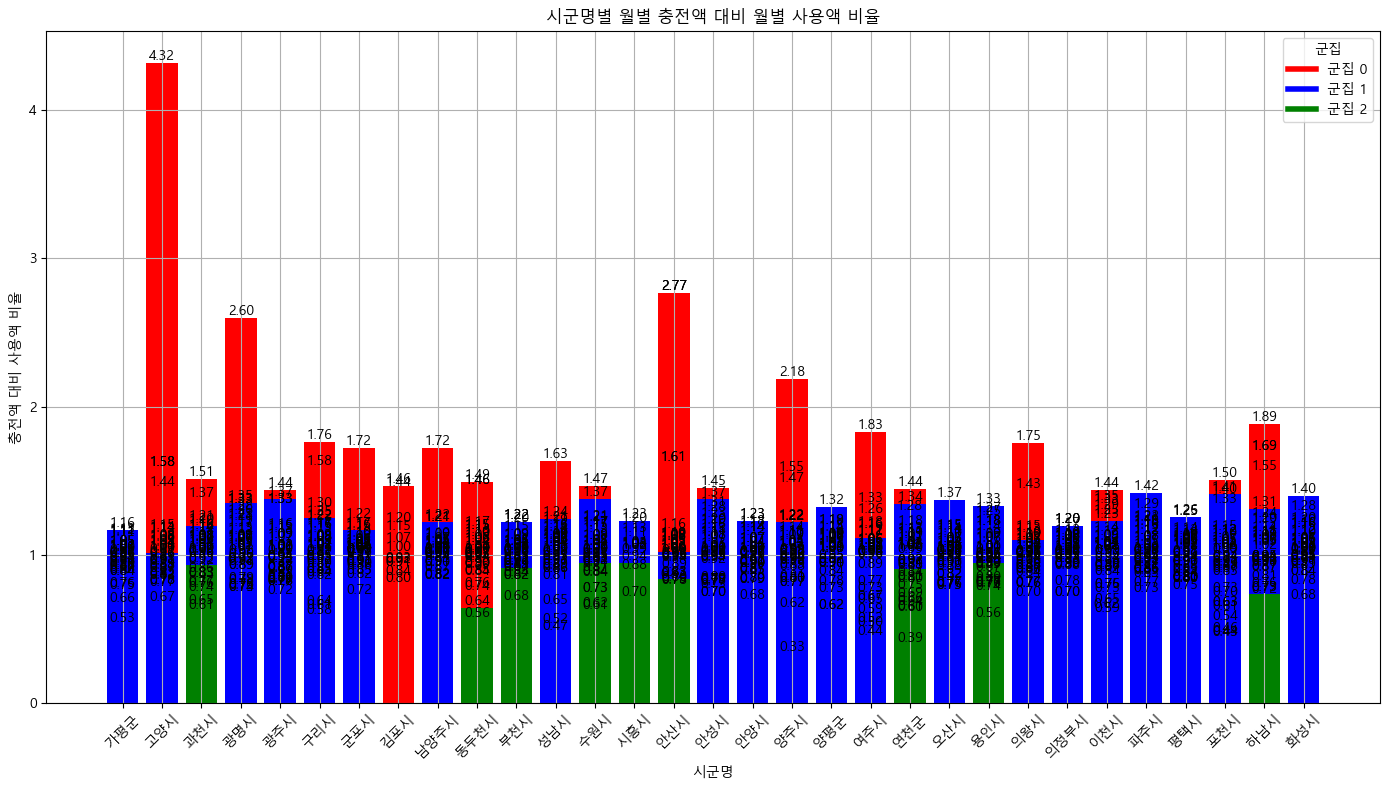

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


# 월별 충전액 대비 월별 사용액 비율 변수 추가
df2['충전액 대비 사용액 비율'] = df2['월별사용액(만원)'] / df2['월별충전액(만원)']

# 결측값 처리 (여기서는 결측값이 없다고 가정하고 있습니다)
# 만약 결측값이 존재할 경우, 다음 두 가지 방법 중 하나를 선택할 수 있습니다:
# 1. 결측값을 포함한 행 제거
df2 = df2.dropna(subset=['충전액 대비 사용액 비율'])

# 2. 결측값을 평균값으로 대체
# mean_value = df2['충전액 대비 사용액 비율'].mean()
# df2['충전액 대비 사용액 비율'].fillna(mean_value, inplace=True)

# 비율의 군집화 (KMeans 사용)
X = df2[['충전액 대비 사용액 비율']].values

# KMeans 모델 설정 (예: 3개의 군집)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df2['군집'] = kmeans.fit_predict(X)

# 시각화
plt.figure(figsize=(14, 8))

# 막대그래프 그리기
bars = plt.bar(df2['시군명'], df2['충전액 대비 사용액 비율'], color=df2['군집'].map({0: 'red', 1: 'blue', 2: 'green'}))

# 군집별 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center', color='black')

plt.xlabel('시군명')
plt.ylabel('충전액 대비 사용액 비율')
plt.title('시군명별 월별 충전액 대비 월별 사용액 비율')
plt.xticks(rotation=45)
plt.legend(handles=[
    plt.Line2D([0], [0], color='red', lw=4, label='군집 0'),
    plt.Line2D([0], [0], color='blue', lw=4, label='군집 1'),
    plt.Line2D([0], [0], color='green', lw=4, label='군집 2')
], title='군집')
plt.grid(True)
plt.tight_layout()
plt.show()
